# **Experiment: 3.2**
**Student Name: Yuvpartap Singh Klair**  
**Student UID: 20BCS6448**  
**Class and Section: PHAIML-2A**  
**AIM: Analysing and Predicting the purchase of Social Network Ads using SVM**



# **Importing the libraries**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# **Importing the dataset**

https://www.kaggle.com/datasets/rakeshrau/social-network-ads

In [3]:
df = pd.read_csv('/content/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.drop("User ID", inplace = True, axis = 1)

In [5]:
df['Gender'] = df['Gender'].replace({'Male': 1, 'Female': 0})
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


# **Splitting the dataset into the Training set and Test set**

In [6]:
x = df[['Gender', 'Age', 'EstimatedSalary']]
y = df['Purchased']

In [7]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=10) 
print("x train->",xtrain.shape)
print("x test->",xtest.shape)

x train-> (280, 3)
x test-> (120, 3)


# **Checking and Dropping for NaN values**

In [8]:
df.shape

(400, 4)

In [9]:
df.isna().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

# **Feature Scaling**

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.fit_transform(xtest)

# **Fitting SVM to the Training set**

In [11]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 11)
classifier.fit(xtrain, ytrain)

SVC(kernel='linear', random_state=11)

# **Predicting the Test set results**

In [12]:
prediction = classifier.predict(xtest)
pd.value_counts(prediction)

0    84
1    36
dtype: int64

# **Making the Confusion Matrix**

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix
#accuracy_score(prediction, ytest)

In [14]:
classifier.score(xtest, ytest) 

0.8583333333333333

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

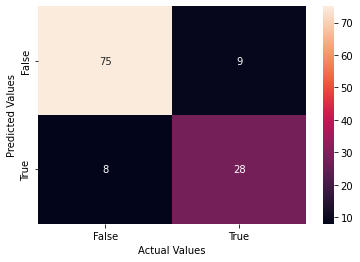

In [15]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(prediction, ytest)
hm = sns.heatmap(cm, annot = True)
hm.set_xlabel('Actual Values')
hm.set_ylabel('Predicted Values');
hm.xaxis.set_ticklabels(['False','True'])
hm.yaxis.set_ticklabels(['False','True'])

# **Visualising the Training set results**

In [18]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(xtrain, ytrain)
y_pred = classifier.predict(xtest)




In [20]:
from sklearn import metrics
metrics.accuracy_score(ytest,y_pred)

0.8583333333333333

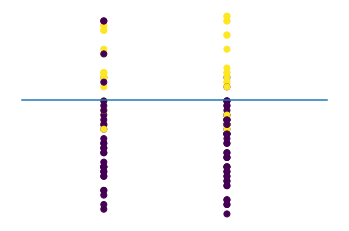

In [21]:
plt.scatter(xtest[:,0], xtest[:, 1], c = ytest)

w = classifier.coef_[0]
a = - w[0] / w[1]
xx = np.linspace(-2.5, 2.5)  
yy = a* xx -(classifier.intercept_[0])/ w[1]

plt.plot(xx,yy)
plt.axis("off"),
plt.show();